In [293]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df=pd.read_excel("/content/AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [295]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

**DATA CLEANING**

In [296]:
(df==-200).any()

,0
Date,False
Time,False
CO(GT),True
PT08.S1(CO),True
NMHC(GT),True
C6H6(GT),True
PT08.S2(NMHC),True
NOx(GT),True
PT08.S3(NOx),True
NO2(GT),True


In [297]:
df.replace(-200,np.nan,inplace=True)

In [298]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [299]:
df.drop(columns='NMHC(GT)',inplace=True)

In [300]:
df['CO(GT)']=df['CO(GT)'].fillna(df['CO(GT)'].mean())
df['C6H6(GT)']=df['C6H6(GT)'].fillna(df['C6H6(GT)'].mean())
df['NOx(GT)']=df['NOx(GT)'].fillna(df['NOx(GT)'].mean())

In [301]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),366
C6H6(GT),0
PT08.S2(NMHC),366
NOx(GT),0
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


In [302]:
df.shape

(9357, 14)

In [303]:
df['datetime']=pd.to_datetime(df['Date'].astype(str)+" "+df['Time'].astype(str))
df['datetime']

,datetime
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00
...,...
9352,2005-04-04 10:00:00
9353,2005-04-04 11:00:00
9354,2005-04-04 12:00:00
9355,2005-04-04 13:00:00


In [304]:
df['month']=df['datetime'].dt.strftime('%b %Y')
df['month']

,month
0,Mar 2004
1,Mar 2004
2,Mar 2004
3,Mar 2004
4,Mar 2004
...,...
9352,Apr 2005
9353,Apr 2005
9354,Apr 2005
9355,Apr 2005


In [305]:
def ext(a):
  if a>=5 and a<12:
    return 'Morning'
  elif a>=12 and a<17:
    return 'Afternoon'
  elif a>=17 and a<21:
    return 'Evening'
  else:
    return 'Night'
df['hour']=df['datetime'].dt.hour
df['hour']=df['hour'].apply(ext)
df['hour']


,hour
0,Evening
1,Evening
2,Evening
3,Night
4,Night
...,...
9352,Morning
9353,Morning
9354,Afternoon
9355,Afternoon


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  datetime       9357 non-null   datetime64[ns]
 15  month          9357 n

In [307]:
df.describe()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
count,9357,9357.000000,8991.000000,9357.000000,8991.000000,9357.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357
mean,2004-09-21 04:30:05.193972480,2.152750,1099.707856,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530,2004-09-21 16:00:00
min,2004-03-10 00:00:00,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,2004-03-10 18:00:00
25%,2004-06-16 00:00:00,1.200000,936.750000,4.591495,734.375000,112.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769,2004-06-16 05:00:00
50%,2004-09-21 00:00:00,2.152750,1063.000000,8.593367,909.000000,229.000000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395,2004-09-21 16:00:00
75%,2004-12-28 00:00:00,2.600000,1231.250000,13.636091,1116.250000,284.200000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701,2004-12-28 03:00:00
max,2005-04-04 00:00:00,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,2005-04-04 14:00:00
std,NaN,1.316068,217.084571,7.302474,266.829000,193.419417,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813,NaN


**DATA ANALYSIS**

In [331]:
pollution_gases = ['NO2(GT)','CO(GT)', 'NOx(GT)','C6H6(GT)']
L=df[pollution_gases].mean()
L


,0
NO2(GT),113.075515
CO(GT),2.152750
NOx(GT),246.881252
C6H6(GT),10.082993


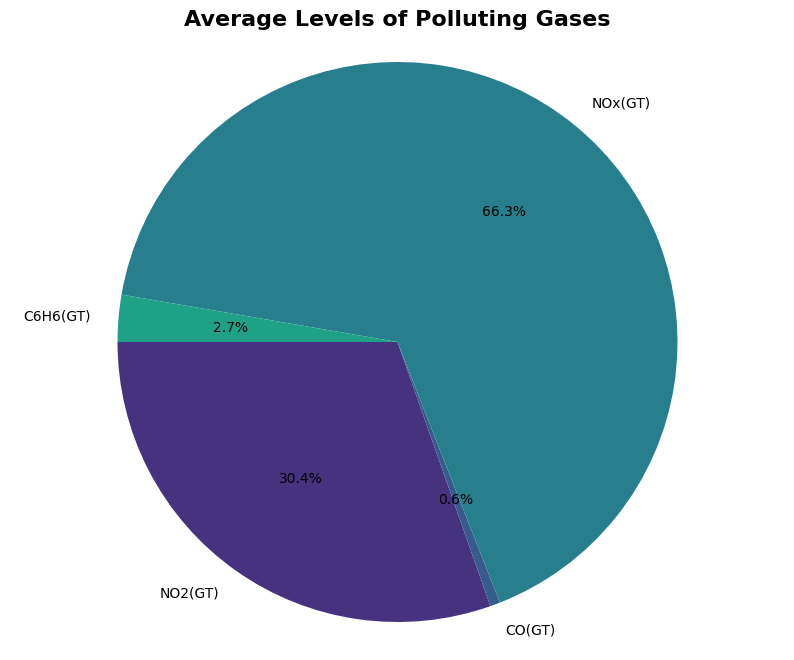

In [334]:
plt.figure(figsize=(10,8))
plt.pie(L,labels=L.index,autopct='%1.1f%%',explode=[0,0,0,0], startangle=180, colors=sns.color_palette('viridis'))
plt.title('Average Levels of Polluting Gases', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

**conculsion**- The above pie chart suggest that the main pollunt gas in monitor area is NOx(GT)

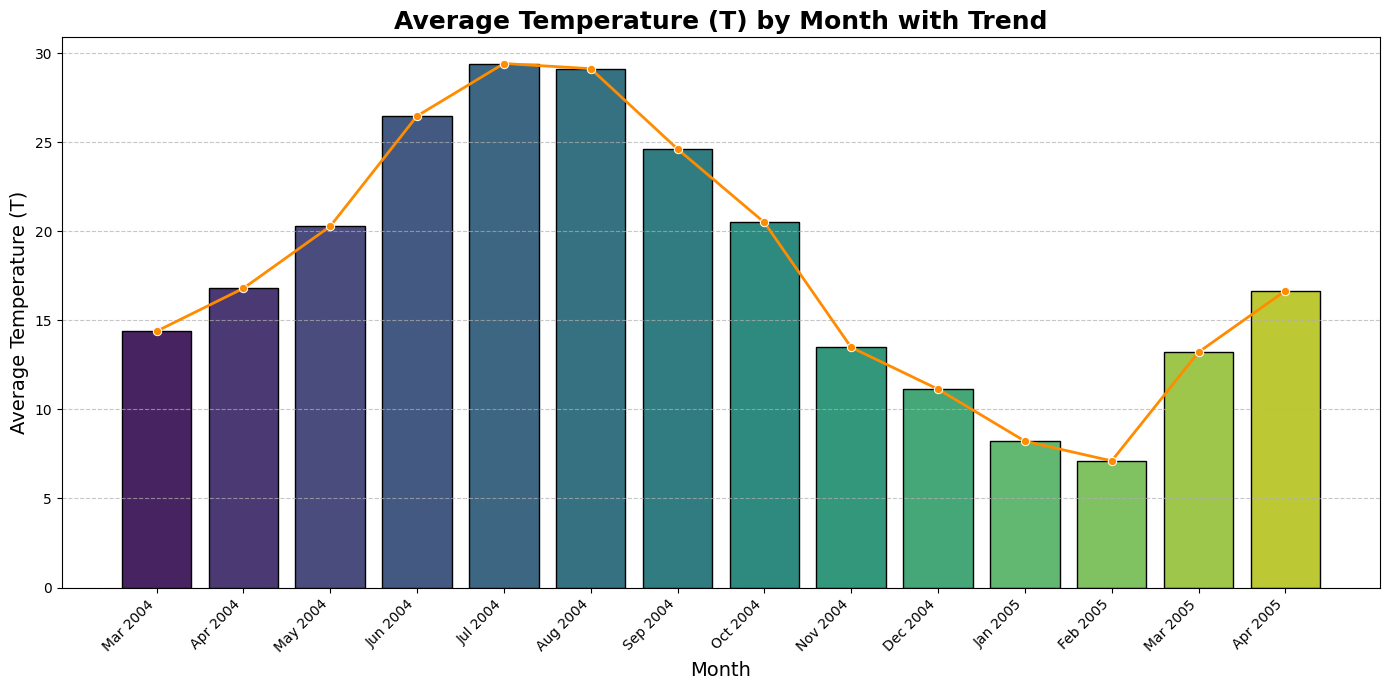

In [310]:
avg_temp_month = df.groupby('month', as_index=False)['T'].mean()
avg_temp_month['month'] = pd.to_datetime(avg_temp_month['month'], format='%b %Y')
avg_temp_month = avg_temp_month.sort_values(by='month')
avg_temp_month['month'] = avg_temp_month['month'].dt.strftime('%b %Y')

plt.figure(figsize=(14, 7))
sns.barplot(data=avg_temp_month, x='month', y='T', hue='month', palette='viridis', edgecolor='black', legend=False)
sns.lineplot(data=avg_temp_month, x='month', y='T', marker='o', color='darkorange', linewidth=2)
plt.title('Average Temperature (T) by Month with Trend', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Temperature (T)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-750852837.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=df.groupby('temp_level')[pollution_gas].mean()


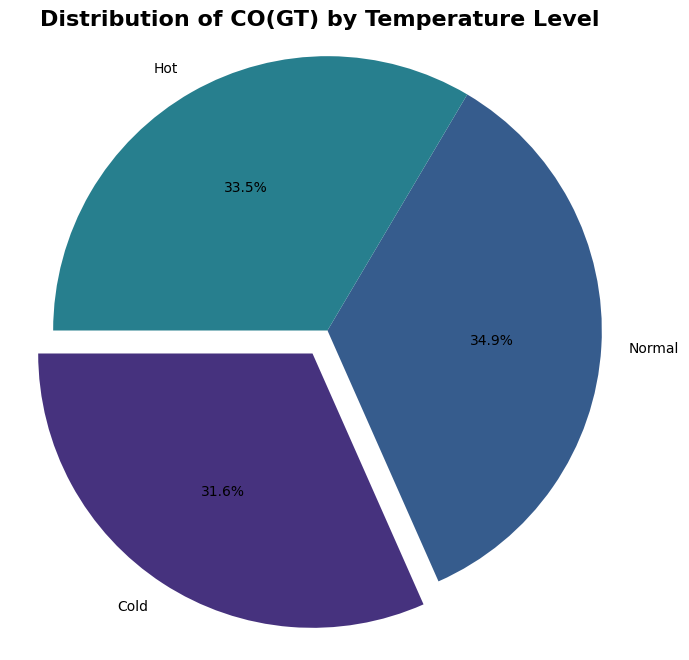

In [311]:
#Temperature vs pollution
pollution_gas = 'CO(GT)'#here we use C0(GT) as are main pollutant because it is mainly use in AQI quality Calculation
plt.figure(figsize=(8,8))
df['temp_level']=pd.cut(df['T'],bins=[-10,10,25,50],labels=['Cold','Normal','Hot'])
x=df.groupby('temp_level')[pollution_gas].mean()
plt.pie(x,labels=x.index,autopct='%1.1f%%',explode=[0.1,0,0], startangle=180, colors=sns.color_palette('viridis'))
plt.title('Distribution of CO(GT) by Temperature Level', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


**conclusion_block**-The bar graph suggest the temperature changing in seasons (winter,summer).The pie chart trend show high pollution in normal and hot season . becuase of high human activity(traffic) and in hot wheather fuel evaporation increase which causes increment in CO2(GT) gas in environment

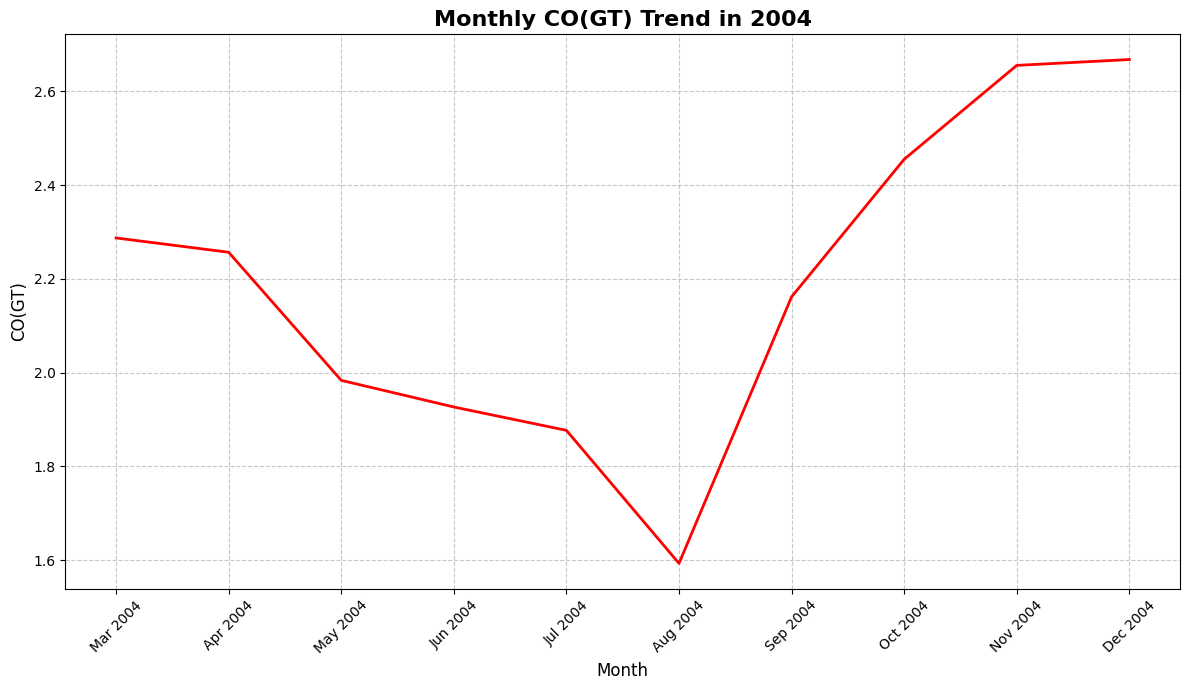

In [312]:
#pollution trend in 2004


df['year']=df['datetime'].dt.year
polluting_gas='CO(GT)'
xy = df.groupby(['month', 'year'], as_index=False)[polluting_gas].mean()
xy = xy[xy['year'] == 2004]
xy['month'] = pd.to_datetime(xy['month'], format='%b %Y')
xy = xy.sort_values(by='month')
xy['month']=xy['month'].dt.strftime('%b %Y')
plt.figure(figsize=(12, 7))
sns.lineplot(data=xy,x='month',y='CO(GT)',markers="o",color='red', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Monthly CO(GT) Trend in 2004', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('CO(GT)', fontsize=12)
plt.tight_layout()
plt.show()

**POLLUTION REDUCE IN AUGUST BECAUSE IN ITALY AUGUST MONTH IS A HOLIDAY MONTH DUE TO WHICH POLLUTION REDUCE AUR SAY OBSERVE A SUDDEN FALL IN TREND**

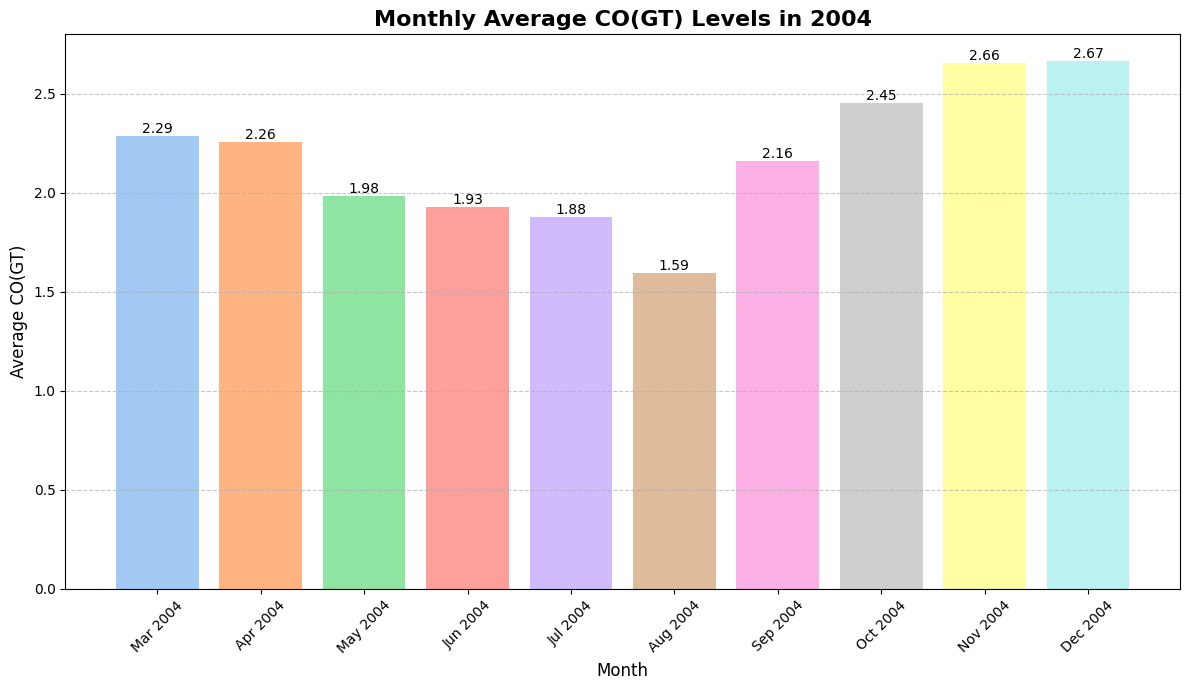

In [313]:
xy = df.groupby(['month', 'year'], as_index=False)[polluting_gas].mean()
xy = xy[xy['year'] == 2004]
xy['month'] = pd.to_datetime(xy['month'], format='%b %Y')
xy = xy.sort_values(by='month')
xy['month']=xy['month'].dt.strftime('%b %Y')

plt.figure(figsize=(12, 7))
v=plt.bar(xy['month'],xy['CO(GT)'], color=sns.color_palette('pastel', len(xy['month'])))
plt.bar_label(v, fmt='%.2f')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Monthly Average CO(GT) Levels in 2004', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.tight_layout()
plt.show()

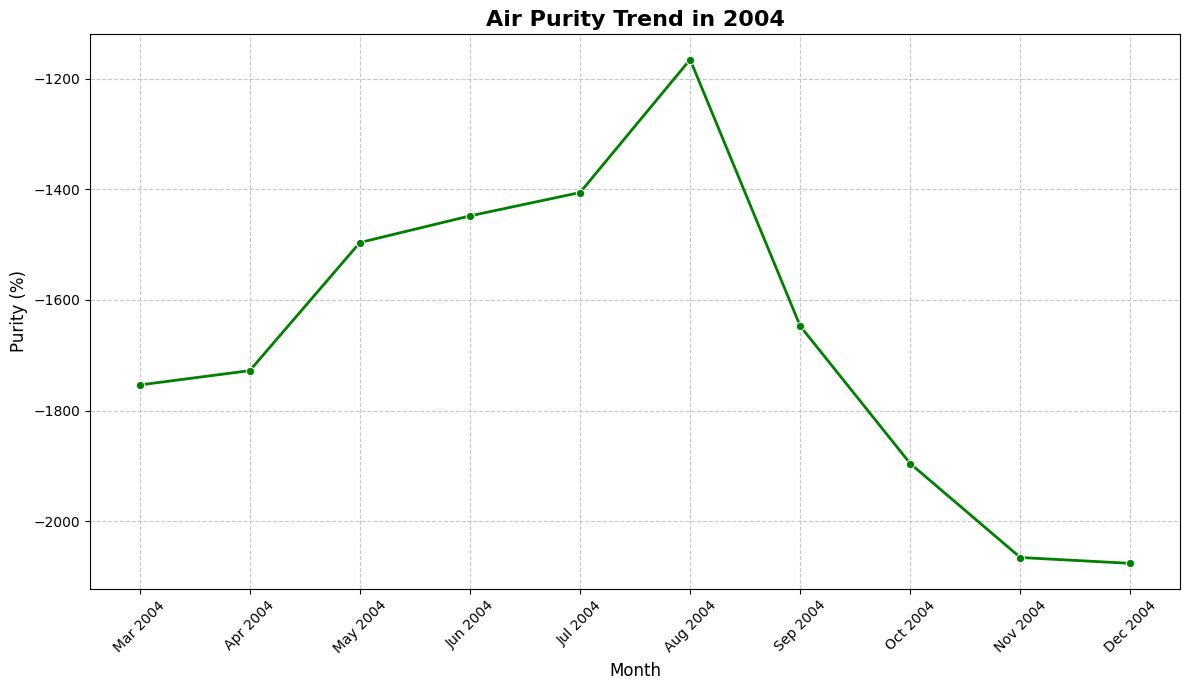

In [314]:
#purity trend in 2004
co_min=df['CO(GT)'].min()
co_max=df['CO(GT)'].max()
pollution_index=(df['CO(GT)']-co_min)/(co_max-co_min)*100
df['Purity']=(1-pollution_index)*100


y = df.groupby(['month', 'year'], as_index=False)['Purity'].mean()
y = y[y['year'] == 2004]
y['month'] = pd.to_datetime(y['month'], format='%b %Y')
y = y.sort_values(by='month')
y['month']=y['month'].dt.strftime('%b %Y')
plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
sns.lineplot(data=y,x='month',y='Purity', marker='o', color='green', linewidth=2)
plt.title('Air Purity Trend in 2004', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Purity (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

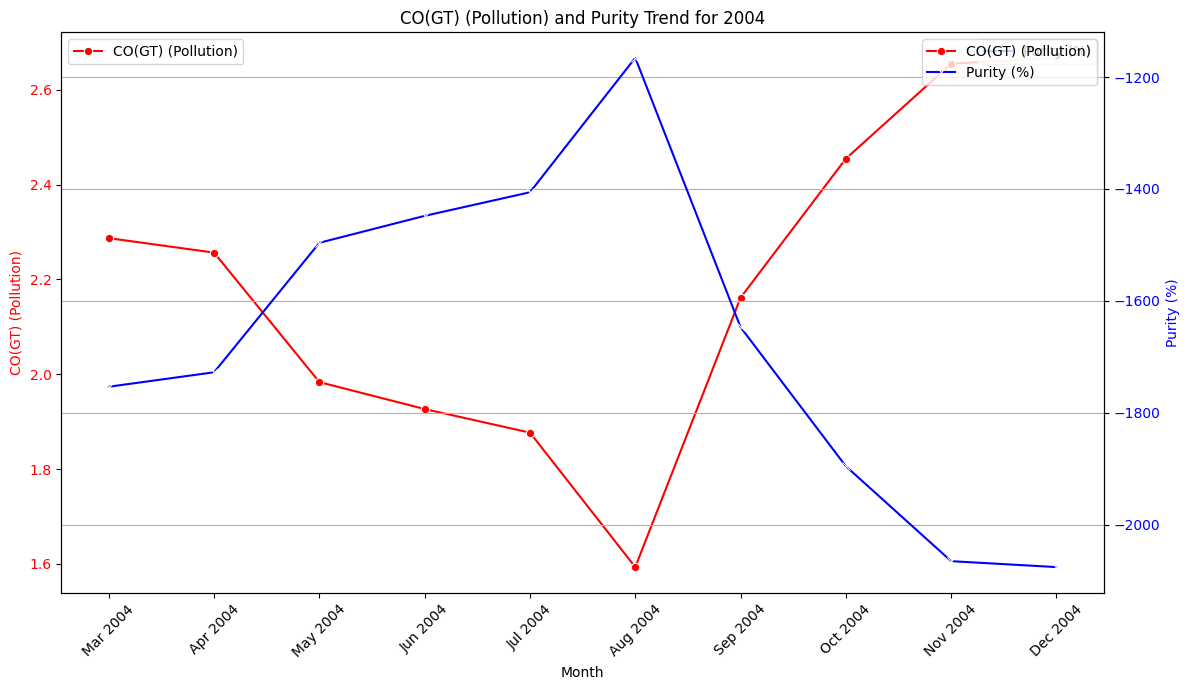

In [315]:
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.lineplot(data=xy, x='month', y='CO(GT)', ax=ax1, color='red', marker='o', label='CO(GT) (Pollution)')
ax1.set_xlabel('Month')
ax1.set_ylabel('CO(GT) (Pollution)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=y, x='month', y='Purity', ax=ax2, color='blue', marker='x', label='Purity (%)')
ax2.set_ylabel('Purity (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('CO(GT) (Pollution) and Purity Trend for 2004')
fig.tight_layout()
plt.grid(True)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

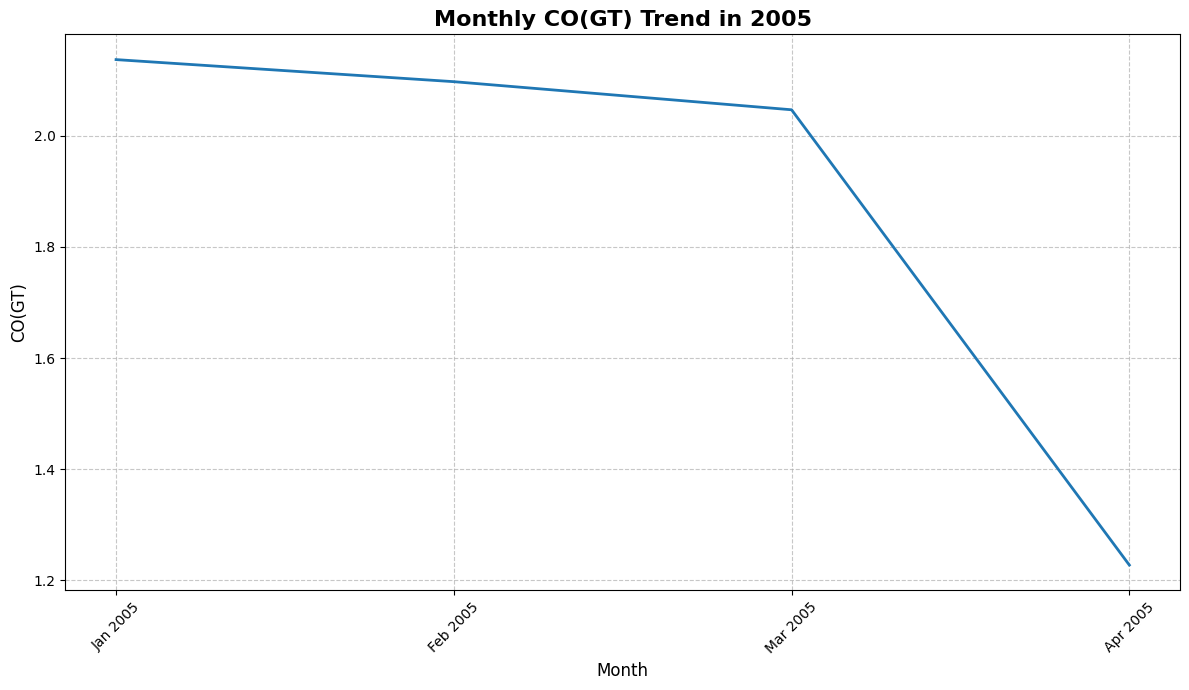

In [316]:
#pollution trend in 2005

polluting_gas='CO(GT)'
z=df.groupby(['month', 'year'], as_index=False)[polluting_gas].mean()
z = z[z['year'] == 2005]
z['month'] = pd.to_datetime(z['month'], format='%b %Y')
z = z.sort_values(by='month')
z['month']=z['month'].dt.strftime('%b %Y')

plt.figure(figsize=(12, 7))
sns.lineplot(data=z,x='month',y='CO(GT)',markers=True,linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Monthly CO(GT) Trend in 2005', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('CO(GT)', fontsize=12)
plt.tight_layout()
plt.show()


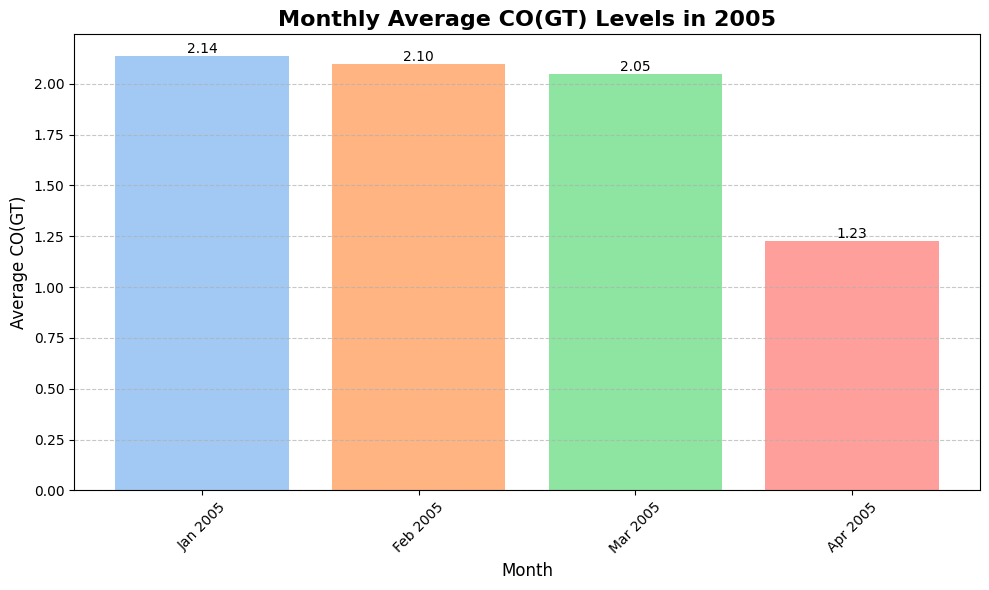

In [317]:
plt.figure(figsize=(10, 6))
dx=plt.bar(z['month'],z['CO(GT)'], color=sns.color_palette('pastel', len(z['month'])))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(dx, fmt='%.2f')
plt.xticks(rotation=45)
plt.title('Monthly Average CO(GT) Levels in 2005', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.tight_layout()
plt.show()

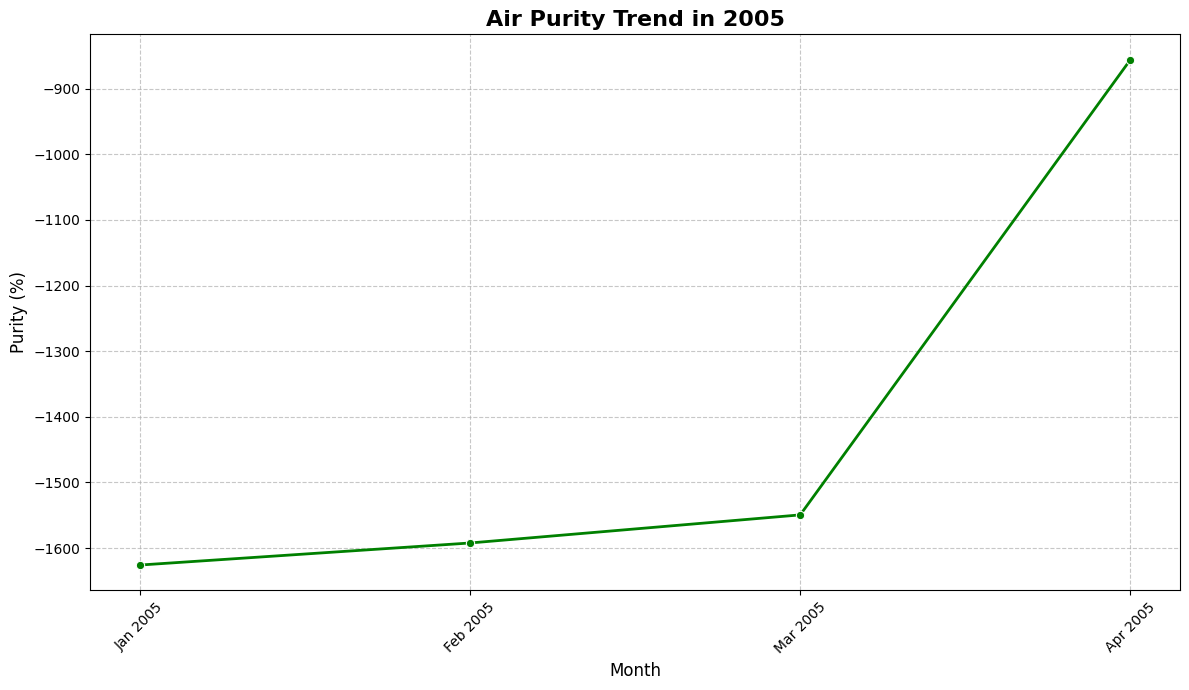

In [318]:
co_min=df['CO(GT)'].min()
co_max=df['CO(GT)'].max()
pollution_index=(df['CO(GT)']-co_min)/(co_max-co_min)*100
df['Purity']=(1-pollution_index)*100
c = df.groupby(['month', 'year'], as_index=False)['Purity'].mean()
c = c[c['year'] == 2005]
c['month'] = pd.to_datetime(c['month'], format='%b %Y')
c = c.sort_values(by='month')
c['month']=c['month'].dt.strftime('%b %Y')
plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
sns.lineplot(data=c,x='month',y='Purity', marker='o', color='green', linewidth=2)
plt.title('Air Purity Trend in 2005', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Purity (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

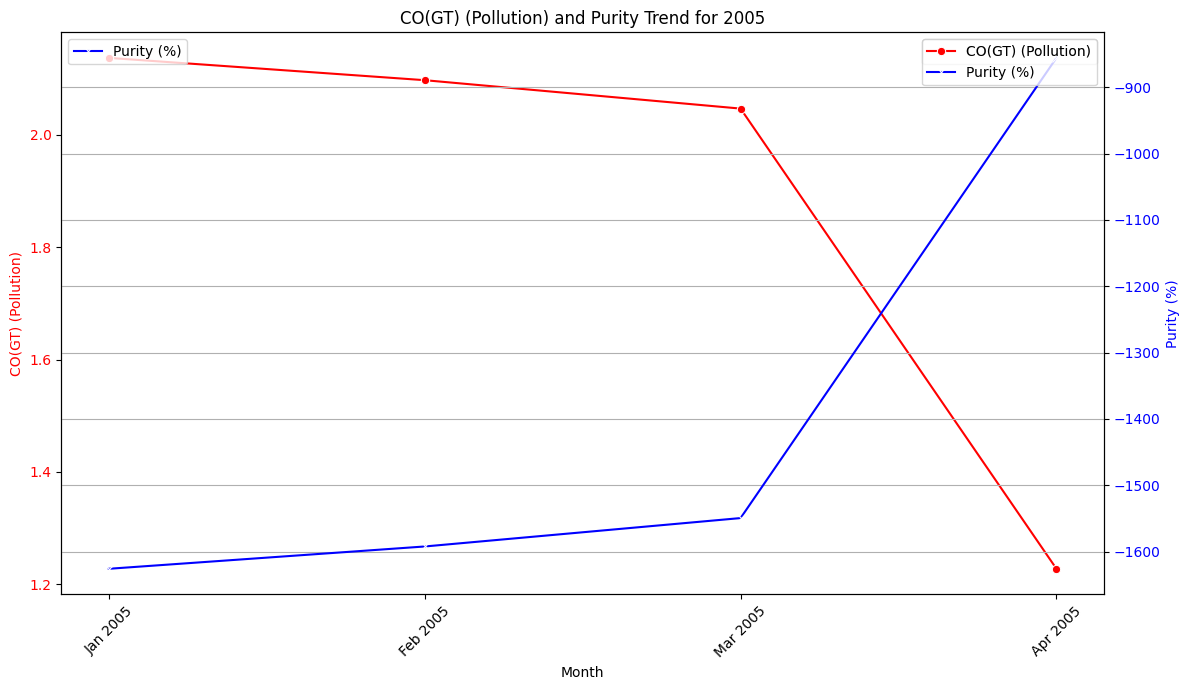

In [319]:
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.lineplot(data=z, x='month', y='CO(GT)', ax=ax1, color='red', marker='o', label='CO(GT) (Pollution)')
ax1.set_xlabel('Month')
ax1.set_ylabel('CO(GT) (Pollution)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=c, x='month', y='Purity', ax=ax2, color='blue', marker='x', label='Purity (%)')
ax2.set_ylabel('Purity (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('CO(GT) (Pollution) and Purity Trend for 2005')
fig.tight_layout()
plt.grid(True)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

<Figure size 800x800 with 0 Axes>

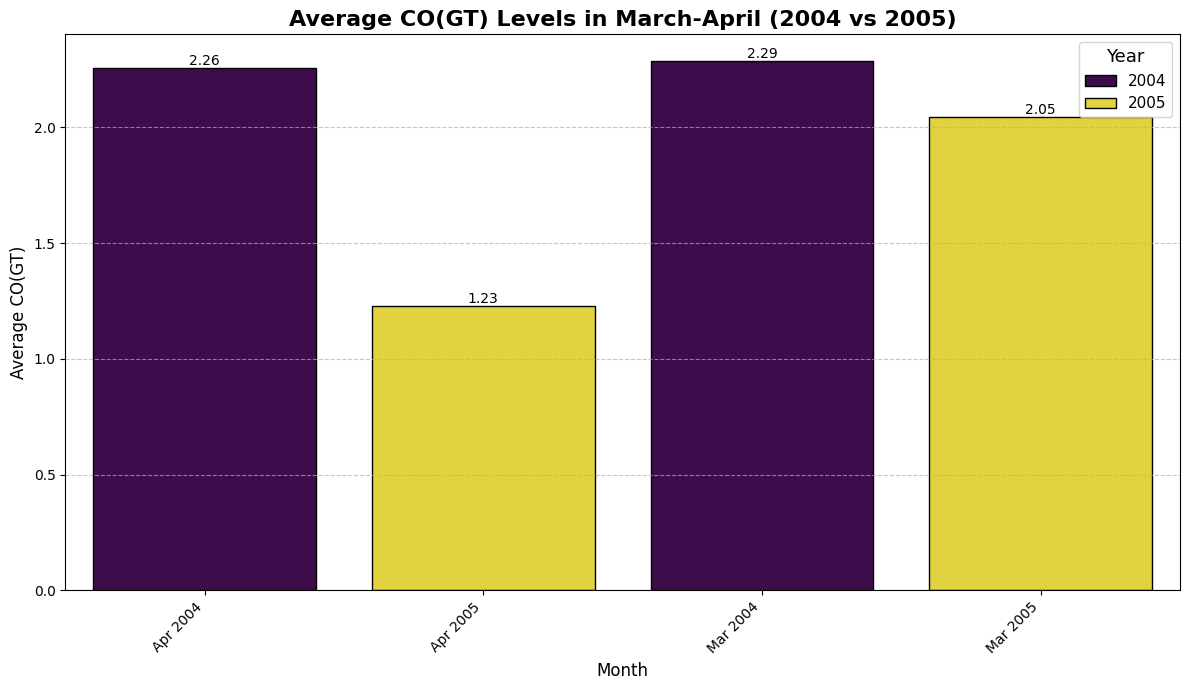

In [320]:
#pollution and purity trend  between 2004 - 2005
plt.figure(figsize=(8,8))
comp_df=df[(df['month'].isin(['Mar 2004','Apr 2004','Mar 2005','Apr 2005']))& df['year'].isin([2004,2005])]
comp_df
b=comp_df.groupby(['month','year'],as_index=False)['CO(GT)'].mean()
plt.figure(figsize=(12, 7))
c=sns.barplot(data=b, x='month', y='CO(GT)', hue='year', palette="viridis", edgecolor='black')
for i in c.containers:
  c.bar_label(i, fmt='%.2f')
plt.title('Average CO(GT) Levels in March-April (2004 vs 2005)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

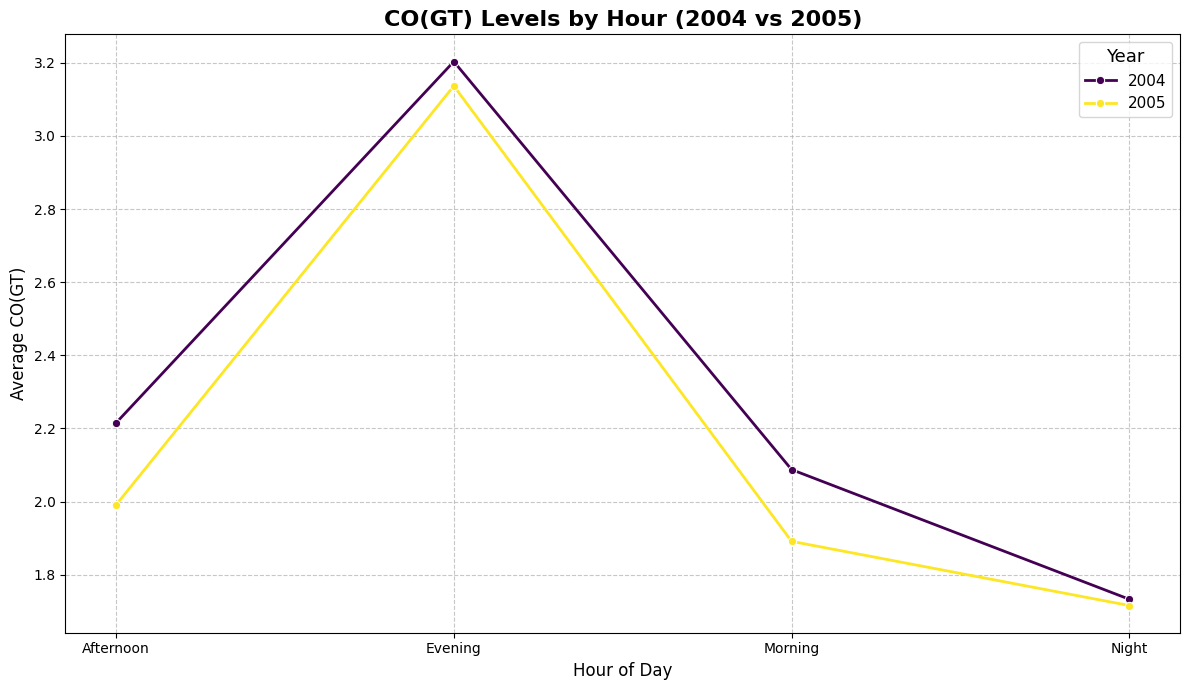

In [321]:
hourly_co_by_year = df.groupby(['hour', 'year'], as_index=False)['CO(GT)'].mean()

plt.figure(figsize=(12, 7))
sns.lineplot(data=hourly_co_by_year, x='hour', y='CO(GT)', marker="o", palette="viridis", hue='year', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('CO(GT) Levels by Hour (2004 vs 2005)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.legend(title='Year', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

POLLUTION -

IN EVENING -- IS HIGH DUE TO HIGH HUMAN ACTIVITY

IN NIGHT-- POLLUTION IN AIR IS LESS

IN AFTERNOON AND MORNING-- THE HUMAN ACTIVITY STARTS THATS WHY THE POLLUTION IN AIR START INCREASING


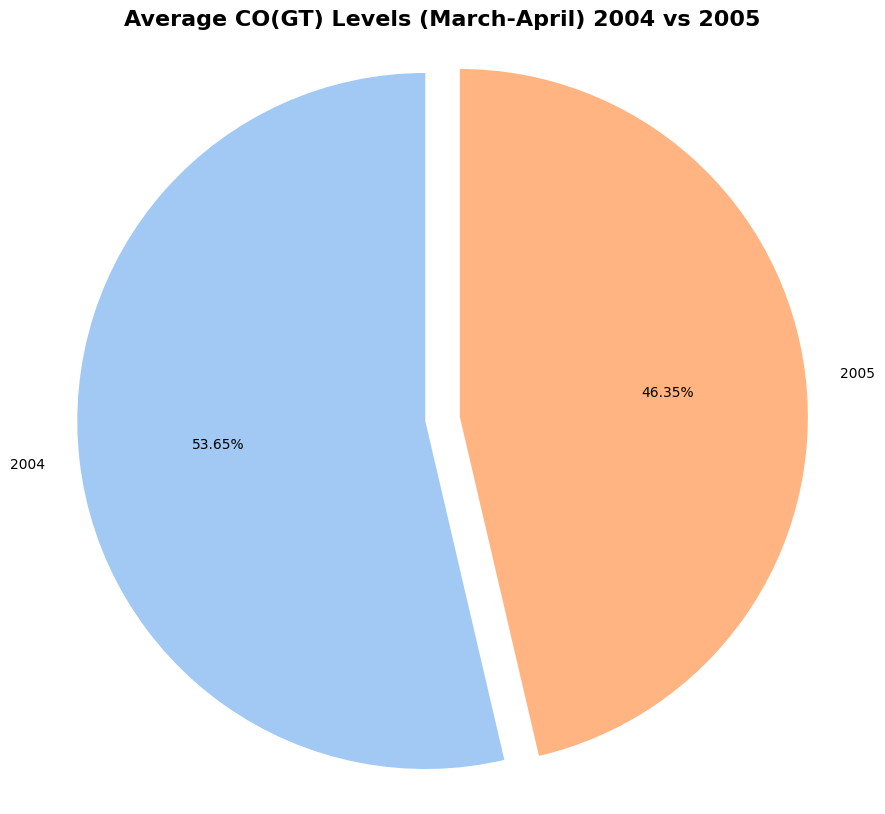

In [322]:
plt.figure(figsize=(10,10))
comp_df=df[(df['month'].isin(['Mar 2004','Apr 2004','Mar 2005','Apr 2005']))& df['year'].isin([2004,2005])]
av=comp_df.groupby('year',as_index=False)['CO(GT)'].mean()
plt.pie(av['CO(GT)'],labels=av['year'],autopct='%.2f%%',startangle=90,colors=sns.color_palette('pastel'), explode=[0.05, 0.05])
plt.title('Average CO(GT) Levels (March-April) 2004 vs 2005', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

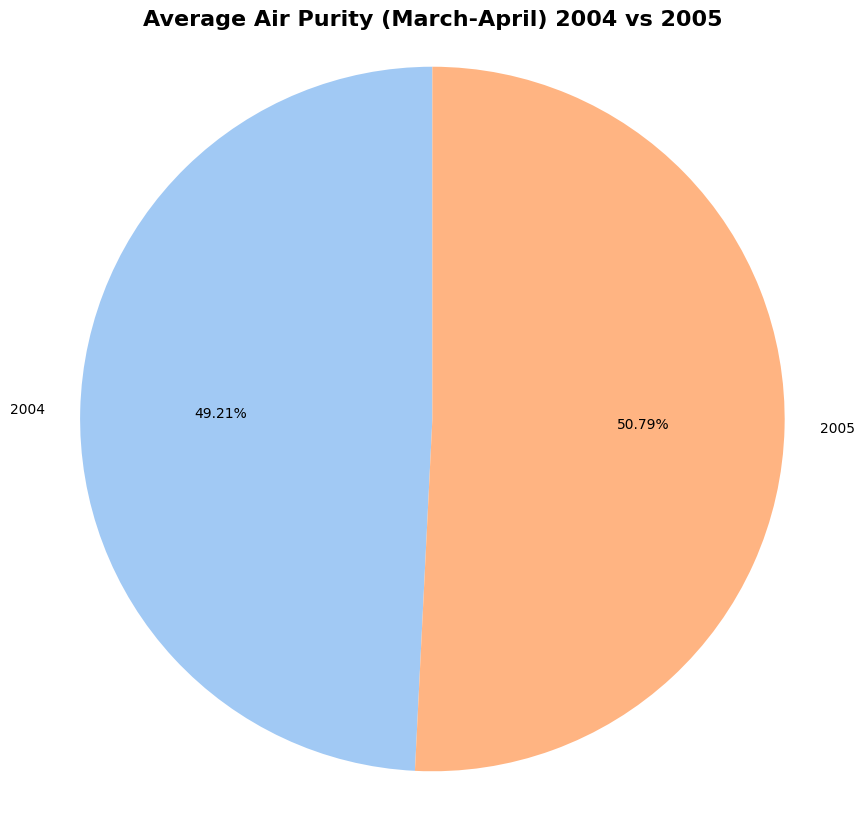

In [323]:
plt.figure(figsize=(10,10)) # Increased figure size for better readability
comp_df=df[(df['month'].isin(['Mar 2004','Apr 2004','Mar 2005','Apr 2005']))& df['year'].isin([2004,2005])].copy()
pollution_scaled = (comp_df['CO(GT)'] - co_min) / (co_max - co_min)
comp_df['Purity'] = (1 - pollution_scaled) * 100

v=comp_df.groupby('year',as_index=False)['Purity'].mean()
plt.pie(v['Purity'],labels=v['year'],autopct='%.2f%%',startangle=90,colors=sns.color_palette('pastel'), explode=[0, 0])
plt.title('Average Air Purity (March-April) 2004 vs 2005', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()
#GOVERNMENT OF ITALY IN 2005 TAKES SEVERAL STEPS TO CONTROL POLLUTION

**conclusion_block**-The Trend('pollution in 2004-2005 -- PURITY IN 2004-2005
')- the pollution increase and decrease with respect to the season in hot season- the air become light clean which help the pollutant gas dissolve in air,but due to human activity(traffic,Ac)the CO(GT) increse in the enivironment. where as in winter season the air become heavy which tarp the pollutant near ground which increase pollution
winter season-showes slighty more polution trend


BOTH INCRESES THE POLLUTION BUT DUE TO DIFFERENT REASONS.

BOTH POLLUTION AND PURITY HAS A STRONG NEGATIVE RELATION

In [324]:
# humidity vs pollution
def hext(a):
  if a>=0 and a<=20:
    return '0-20%'
  elif a>20 and a<=40:
    return '21-40%'
  elif a>=41 and a<=60:
    return '41-60%'
  elif a>=61 and a<=80:
    return '61-80'
  else:
    return '81-100%'
df['humidity_per']=df['RH'].apply(hext)
df['humidity_per']

,humidity_per
0,41-60%
1,41-60%
2,41-60%
3,41-60%
4,41-60%
...,...
9352,21-40%
9353,21-40%
9354,0-20%
9355,0-20%


In [325]:
hx=df.groupby('humidity_per',as_index=False)['CO(GT)'].mean()
hx

,humidity_per,CO(GT)
0,0-20%,1.936159
1,21-40%,2.101606
2,41-60%,2.119747
3,61-80,2.229004
4,81-100%,2.322110


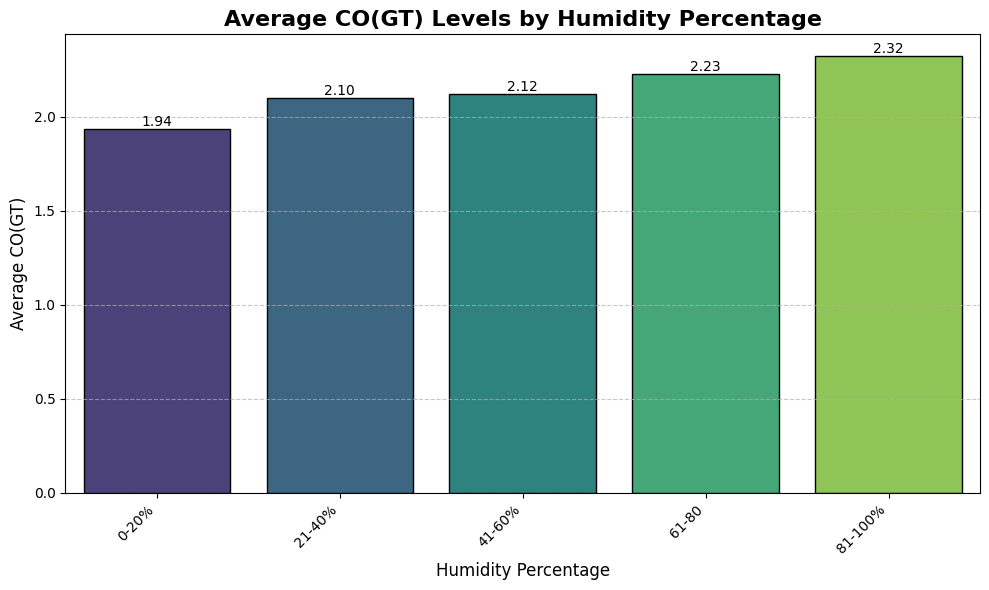

In [326]:
plt.figure(figsize=(10,6))
sns.barplot(data=hx, x='humidity_per', y='CO(GT)', hue='humidity_per', palette='viridis', edgecolor='black', legend=False)
plt.title('Average CO(GT) Levels by Humidity Percentage', fontsize=16, fontweight='bold')
plt.xlabel('Humidity Percentage', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels for better readability
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

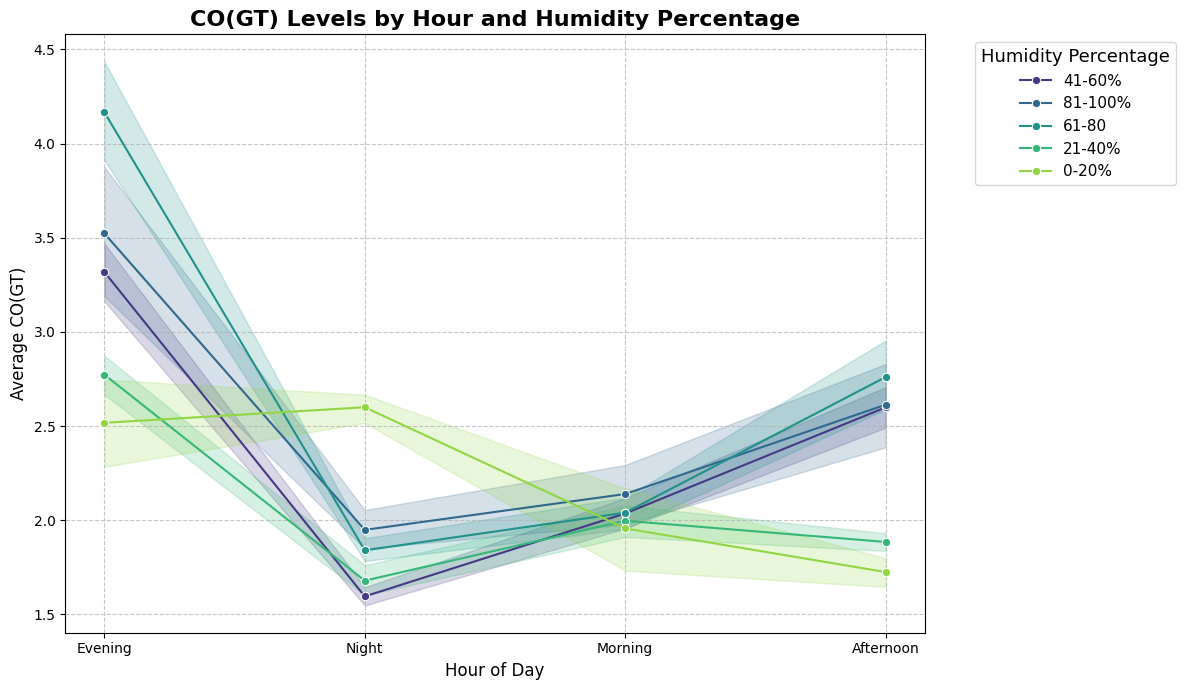

In [327]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='hour', y='CO(GT)', hue='humidity_per', palette='viridis', marker='o')
plt.title('CO(GT) Levels by Hour and Humidity Percentage', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average CO(GT)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Humidity Percentage', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**conclusion_block** THE TREND SHOWS THE RELATION OF HUMIDITY WITH POLLUTION
SCIENTIFICALY WHEN THE HUMIDITY RISE THE AIR BECOME CLEAN BUT IN THIS DATASET(ITALY) THE HIGH HUMIDITY OCCURS IN WINTER SEASON(HEAVY AIR) DUE TO WHICH THE POLLUTION RISE

THE HUMIDITY IS NOT THE MAIN CAUSE OF POLLUTION

**FINAL_STATEMENT**

THE ANALYSIS ON THIS AIR QUALITY DATASET(ITALY) SHOWS THE MODERATE CO(GT) POLLUTION IN ENVIRONMENT . THE MAIN CAUSE OF THE POLLUTION(CO(GT)) IN THE AIR
IS HUMAN ACTIVITY. **(CO(GT)) IS THE MAIN CAUSE OF BREATH PROBLEM**


WE OBSERVE THE SLIGHTLY REDUCTION IN POLLUTION IN YEAR-2005 DUE TO GOVERNMENT LAW TO REDUCE AIR POLLUTION

AIR POLLUTION DO NOT REDUCE DRASTICALLY IT TAKE TIME THATS THE REASON WE **OBSERVE SLIGHTY REDUCTION IN POLLUTION IN YEAR 2005**

**IT SUGGEST TO TAKE MORE ACTION TO REDUCE THE AIR POLLUTION**

